# Week 6 MPG Assignment
## Francis Yang 11/8/2022
**Step 1:**
Import the modules needed to explore the data pandas, numpy, seaborn, matplotlib <br>

**Step 2:**
Import auto_mpg.csv dataset using pandas `read_csv()`. Print the first three samples from your dataset, print the index range of the observations, and print the column names of your dataset


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('datasets/auto_mpg.csv')
data[0:3]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite


In [2]:
data.shape

(398, 9)

In [3]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

**Step 3:**
Assign mpg column as output and name it as y and the rest of the data as the features and assign it to X. Print the shape of X.


In [4]:
Y = data['mpg']
X = data.drop('mpg', axis=1)
X.shape

(398, 8)

**Step 4:**
Bonus: Check the dataset if there are any missing values in any of the columns using `isnull().any()` functions.


In [5]:
X.isnull().any()

cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
car name        False
dtype: bool

**Step 5:**
Check the data types of each feature. Which columns are continuous and which are categorical?


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


Columns with integer data type are likely categorical because they are whole. Exception is weight. Also string data type is categorical. Columns with float data type are likely continuous.

**Step 6:**
Look at the unique elements of horsepower


In [7]:
X.horsepower.unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
       104., 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

**Step 7:**
Let's describe data since everything looks in order.
-	See the statistical details of the dataset using describe and info methods


In [8]:
X.describe()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,104.462312,2970.424623,15.568090,76.010050,1.572864
std,1.701004,104.269838,38.199230,846.841774,2.757689,3.697627,0.802055
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


**Step 8:**
Let's specifically look at the description of the mpg feature


In [9]:
Y.describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

**Step 9:**
Visualize the distribution of the features of the data using hist method, use bins=20


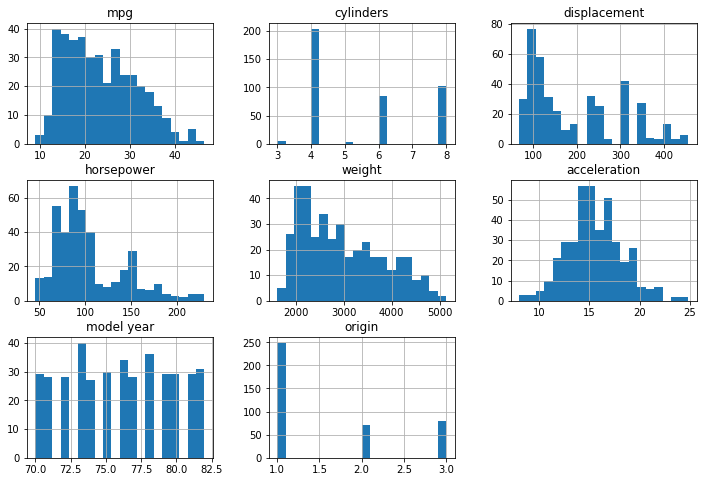

In [10]:
data.hist(bins=20, figsize=(12,8));

Multiple non-connecting histograms are obviously categorical variables

**Step 10:**
BONUS: Visualize the relationships between these data points.
-	Create a function to scale your dataset by using the formula 𝑏=𝑥−𝑚𝑖𝑛𝑚𝑎𝑥−𝑚𝑖𝑛
-	Using this function, scale *displacement, horsepower, acceleration, weight, and mpg*
-	Create a boxplot of *mpg* for different *origin* values before and after scaling.
\begin{equation}
  ScaledValue= \frac{OriginalValue−FeatureMinimum}{FeatureMaximum−FeatureMinimum}
\end{equation}


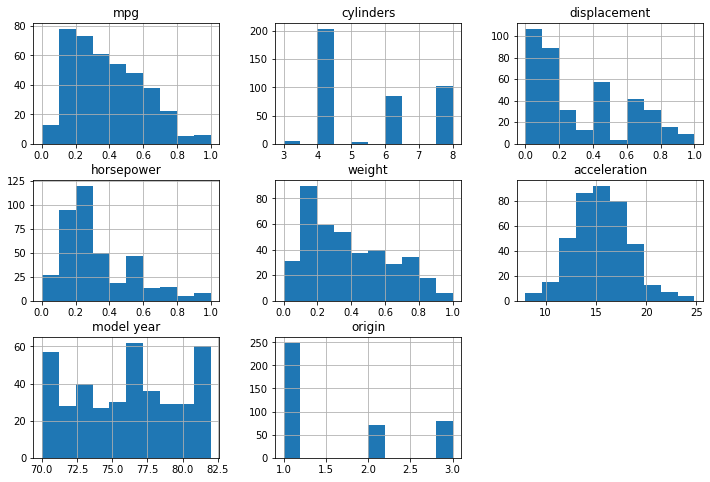

In [11]:
scalecol = ['displacement', 'horsepower', 'weight', 'mpg']
scaled_data = data.copy()
for col in scalecol:
    colmin = scaled_data[col].min()
    colmax = scaled_data[col].max()
    scaled_data[col] = (scaled_data[col]-colmin)/(colmax - colmin)

scaled_data.hist(figsize=(12,8));

Notice the histogram is the same, but the x-axis is between 0 and 1.

Text(0, 0.5, 'mpg')

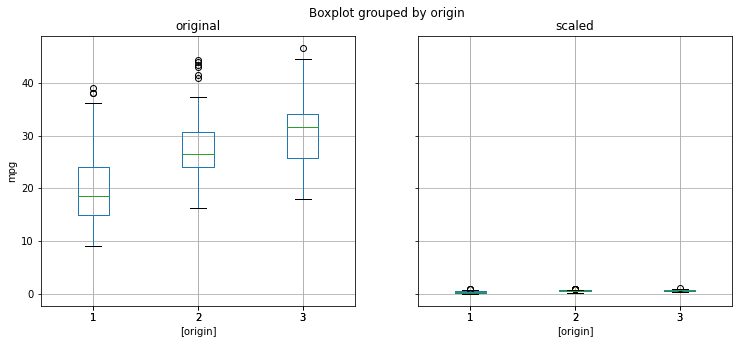

In [27]:
df = pd.DataFrame(data={'original':data.mpg,'scaled':scaled_data.mpg,'origin':data.origin})

fig = df.boxplot(by='origin', figsize=(12,5))
fig[0].set_ylabel('mpg')